In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as sts

from sklearn import svm
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss, confusion_matrix

sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('/content/Weather Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

In [4]:
df['Date'] = df['Date'].astype('datetime64[ns]')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'W'),
  Text(1, 0, 'NNW'),
  Text(2, 0, 'WNW'),
  Text(3, 0, 'ENE'),
  Text(4, 0, 'NNE'),
  Text(5, 0, 'NW'),
  Text(6, 0, 'SSE'),
  Text(7, 0, 'NE'),
  Text(8, 0, 'ESE'),
  Text(9, 0, 'WSW'),
  Text(10, 0, 'SE'),
  Text(11, 0, 'SW'),
  Text(12, 0, 'N'),
  Text(13, 0, 'E'),
  Text(14, 0, 'SSW'),
  Text(15, 0, 'S')])

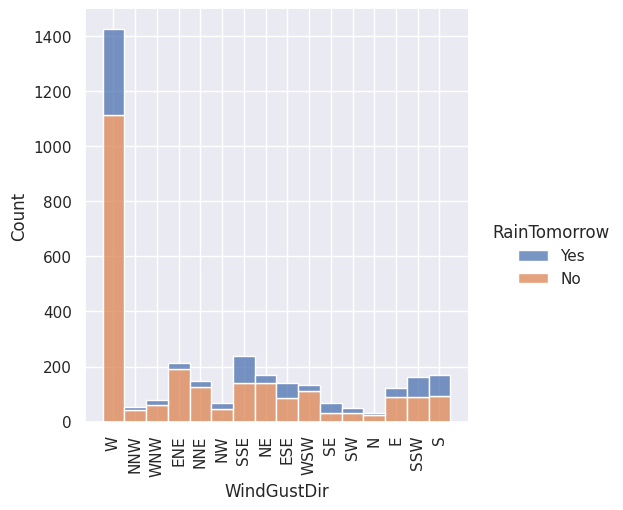

In [5]:
sns.displot(x='WindGustDir', hue='RainTomorrow', data=df, multiple='stack')
plt.xticks (rotation='vertical')

<Axes: xlabel='RainTomorrow', ylabel='Rainfall'>

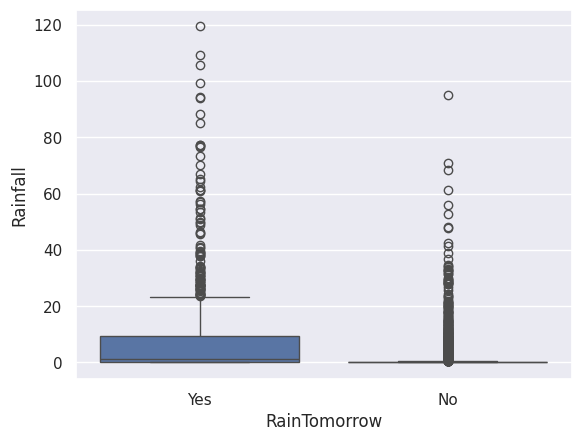

In [6]:
sns.boxplot(data=df,x='RainTomorrow', y='Rainfall')

<Axes: xlabel='RainTomorrow', ylabel='Sunshine'>

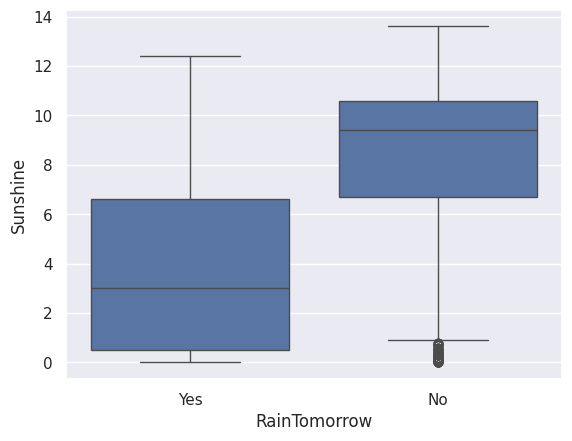

In [7]:
sns.boxplot(data=df, x="RainTomorrow", y="Sunshine")

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [10]:
df.dtypes

,0
Date,datetime64[ns]
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,int64
WindGustSpeed,int64
WindDir9am,int64
WindDir3pm,int64


,count
RainTomorrow,
0,2422
1,849


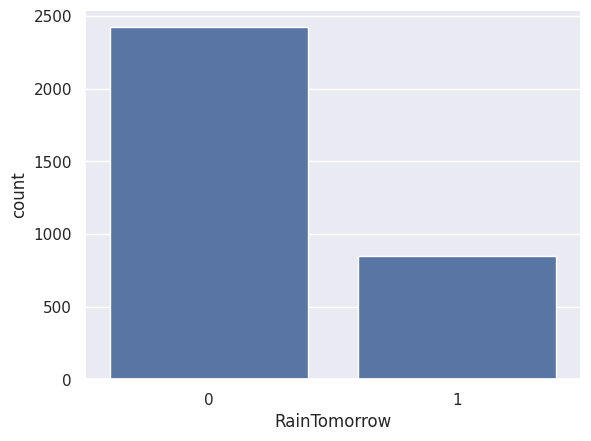

In [12]:
sns.countplot(data = df,x=df['RainTomorrow'])
df['RainTomorrow'].value_counts()

In [13]:
df_maj = df[(df['RainTomorrow']==0)]
df_main = df[(df['RainTomorrow']==1)]

df_main_upsc = resample(df_main,replace=True,n_samples=len(df_maj),random_state=42)

df_upsc = pd.concat([df_maj,df_main_upsc])

<Axes: xlabel='RainTomorrow', ylabel='count'>

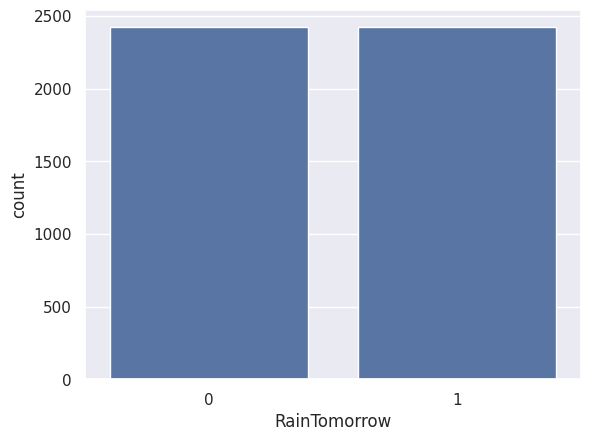

In [14]:
sns.countplot(data = df,x = df_upsc['RainTomorrow'])

In [16]:
df_upsc.drop(['Date'],axis=1,inplace=True)
df_upsc.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
9,14.6,24.2,8.8,4.4,10.1,13,41,13,10,11,20,80,53,1014.0,1013.4,4,2,17.2,23.3,1,0
10,16.4,23.9,0.0,6.4,8.0,13,41,14,0,9,26,78,53,1017.6,1015.3,7,8,18.9,23.7,0,0
13,16.9,24.3,3.0,3.2,8.7,13,41,11,10,15,19,81,51,1017.2,1016.5,7,1,18.4,23.3,1,0
14,18.3,24.4,0.0,6.2,8.5,13,41,12,10,19,22,80,56,1020.2,1018.9,7,3,19.5,23.8,0,0
15,16.7,24.1,0.0,6.2,8.8,13,41,14,10,11,26,77,52,1023.0,1022.6,7,6,19.8,23.3,0,0


In [17]:
z = np.abs(sts.zscore(df_upsc))
dc = df_upsc[(z < 3).all(axis=1)]
dc.shape

(4562, 21)

<Axes: >

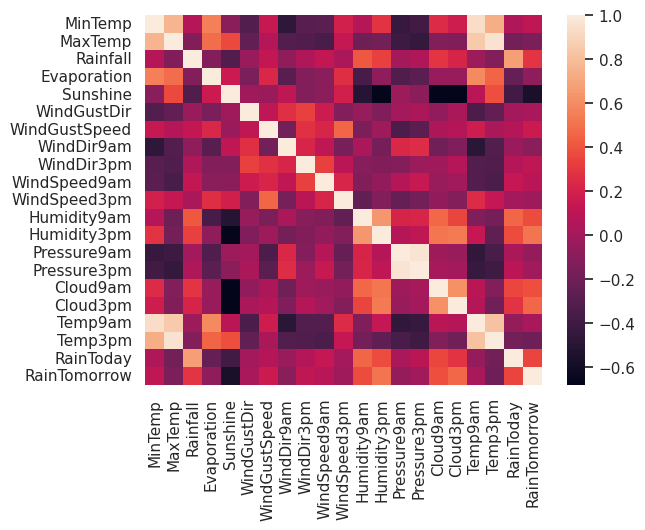

In [19]:
sns.heatmap(dc.corr(), fmt='.2g')

In [20]:
x = dc.drop(['RainTomorrow'],axis=1)
y = dc['RainTomorrow']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("F-1 Score:-",round(f1_score(y_test,y_pred,average='micro')*100,2))
print("Accuracy Score:-",round(accuracy_score(y_test,y_pred)*100,2))
print("Recall Score:-",round(recall_score(y_test,y_pred,average='micro')*100,2))
print("Log Loss:-",log_loss(y_test,y_pred))

F-1 Score:- 79.41
Accuracy Score:- 79.41
Recall Score:- 79.41
Log Loss:- 7.421913293706489


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("F-1 Score:-",round(f1_score(y_test,y_pred,average='micro')*100,2))
print("Accuracy Score:-",round(accuracy_score(y_test,y_pred)*100,2))
print("Recall Score:-",round(recall_score(y_test,y_pred,average='micro')*100,2))
print("Log Loss:-",log_loss(y_test,y_pred))

F-1 Score:- 80.72
Accuracy Score:- 80.72
Recall Score:- 80.72
Log Loss:- 6.948174147299692


In [31]:
sv = svm.SVC()
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
print("F-1 Score:-",round(f1_score(y_test,y_pred,average='micro')*100,2))
print("Accuracy Score:-",round(accuracy_score(y_test,y_pred)*100,2))
print("Recall Score:-",round(recall_score(y_test,y_pred,average='micro')*100,2))
print("Log Loss:-",log_loss(y_test,y_pred))

F-1 Score:- 74.7
Accuracy Score:- 74.7
Recall Score:- 74.7
Log Loss:- 9.119478568330843


In [32]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("F-1 Score:-",round(f1_score(y_test,y_pred,average='micro')*100,2))
print("Accuracy Score:-",round(accuracy_score(y_test,y_pred)*100,2))
print("Recall Score:-",round(recall_score(y_test,y_pred,average='micro')*100,2))
print("Log Loss:-",log_loss(y_test,y_pred))

F-1 Score:- 88.17
Accuracy Score:- 88.17
Recall Score:- 88.17
Log Loss:- 4.263652317661174


In [33]:
imp_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": dt.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

,Feature Name,Importance
4,Sunshine,0.326938
12,Humidity3pm,0.102616
11,Humidity9am,0.050445
1,MaxTemp,0.050399
2,Rainfall,0.047924
14,Pressure3pm,0.044649
13,Pressure9am,0.043433
0,MinTemp,0.038932
6,WindGustSpeed,0.035652
18,Temp3pm,0.032058


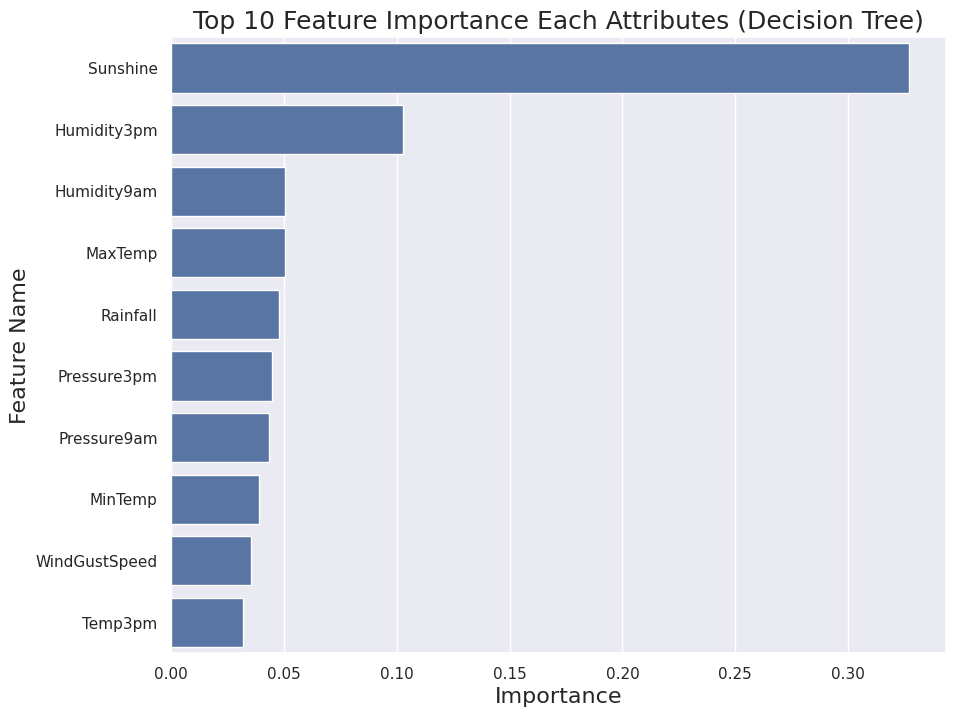

In [34]:
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()